# Trabalho: Proposta de Mineração de Dados

In [1]:
# Importação das Bibliotecas
import os
import csv
import statistics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**1)** DESENVOLVER UM PROCEDIMENTO PARA EFETUAR A PREPARAÇÃO DOS DADOS – GERALMENTE OS VALORES FORA DA FAIXA DE ANÁLISE PADRÃO SÃO “REMOVIDOS”/”SUBSTITUÍDOS” POR UM VALOR MÉDIO ENTRE O VALOR ANTECESSOR E POSTERIOR. DESENVOLVER O SOFTWARE EM PYTHON.

In [11]:
# ============================= LEITURA DOS DADOS =============================
dados = []

path = os.getcwd()+os.sep+"sinaisvitais003 100dias DV2 RAxxx4.txt"
with open(path,'r',newline='') as ARQUIVO:
    d = csv.reader(ARQUIVO)
    dd = list(d)
    for i in range(0,len(dd)):
        p = dd[i][0]  
        palavras = p.split("\t")
        dados.append({"HORA":palavras[0],"BATIMENTO":palavras[1],
                      "PRESSAO":palavras[2],"TEMPERATURA":palavras[3]})

# Criar o DataFrame Inicial
df0 = pd.DataFrame(data = dados, dtype=float)

# Criar o DataFrame Final
df = pd.DataFrame(data = dados, dtype=float)

**Tratamento dos valores incoerentes da base de dados**

In [13]:
# ================================= Batimento =================================
# Excluir valores fora da faixa
#df = df.loc[df['BATIMENTO'] <= 100]

# Substituir pela média
for j in range(len(dd)):
    if df['BATIMENTO'][j] > 100:
        df['BATIMENTO'].replace(df['BATIMENTO'][j], np.NaN, inplace=True)

df['BATIMENTO'].fillna(df['BATIMENTO'].mean(), inplace=True)

# Substituir pela média entre o anterior e posterior
#for j in range(len(dd)):
#    if df['BATIMENTO'][j] > 100:
#        m_aux = (df['BATIMENTO'][j-1]+df['BATIMENTO'][j+1])/2
#        df['BATIMENTO'].replace(df['BATIMENTO'][j], m_aux, inplace=True)
        
# ================================== Pressão ==================================
# Excluir valores fora da faixa
#df = df.loc[df['PRESSAO'] <= 20]

# Substituir pela média
for j in range(len(dd)):
    if df['PRESSAO'][j] > 20:
        df['PRESSAO'].replace(df['PRESSAO'][j], np.NaN, inplace=True)
        
df['PRESSAO'].fillna(df['PRESSAO'].mean(), inplace=True)

# Substituir pela média entre o anterior e posterior
#for j in range(len(dd)):
#    if df['PRESSAO'][j] > 20:
#        m_aux = (df['PRESSAO'][j-1]+df['PRESSAO'][j+1])/2
#        df['PRESSAO'].replace(df['PRESSAO'][j], m_aux, inplace=True)
        
# ================================ Tempertura =================================
# Excluir valores fora da faixa
#df = df.loc[df['TEMPERATURA'] <= 40]

# Substituir pela média
for j in range(len(dd)):
    if df['TEMPERATURA'][j] > 40:
        df['TEMPERATURA'].replace(df['TEMPERATURA'][j], np.NaN, inplace=True)

df['TEMPERATURA'].fillna(df['TEMPERATURA'].mean(), inplace=True)

# Substituir pela média entre o anterior e posterior
#for j in range(len(dd)):
#    if df['TEMPERATURA'][j] > 40:
#        m_aux = (df['TEMPERATURA'][j-1]+df['TEMPERATURA'][j+1])/2
#        df['TEMPERATURA'].replace(df['TEMPERATURA'][j], m_aux, inplace=True)

**Plotagem dos sinais e dos histogramas dos dados tratados**

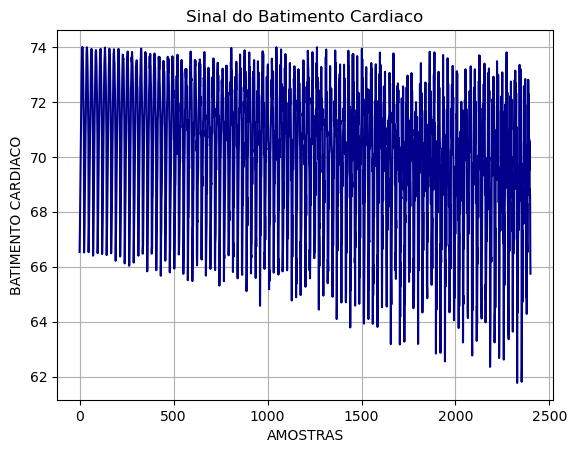

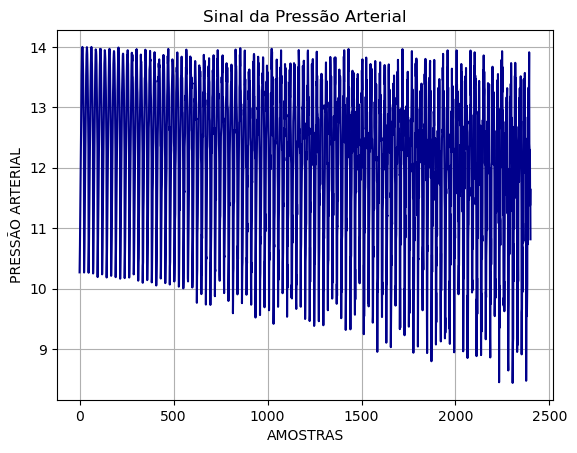

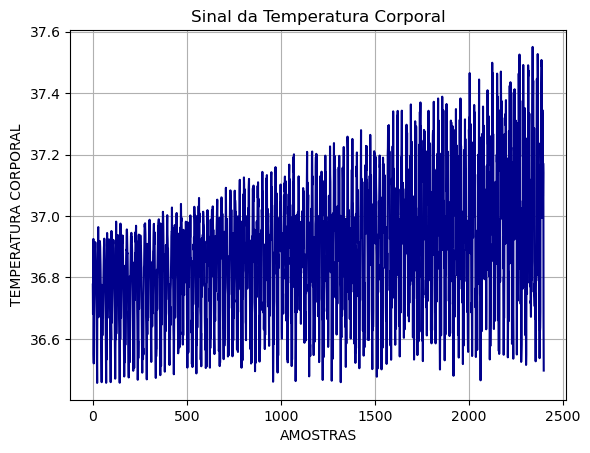

<Axes: title={'center': 'Histograma da Temperatura Corporal'}, xlabel='TEMPERATURA', ylabel='Count'>

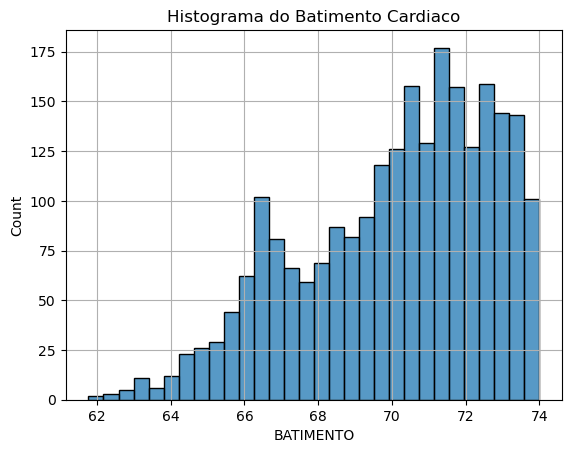

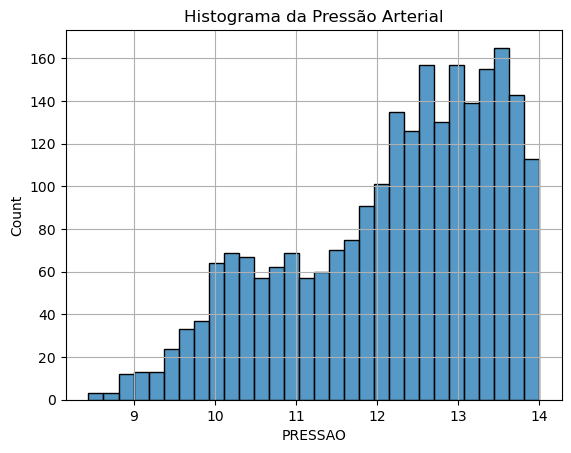

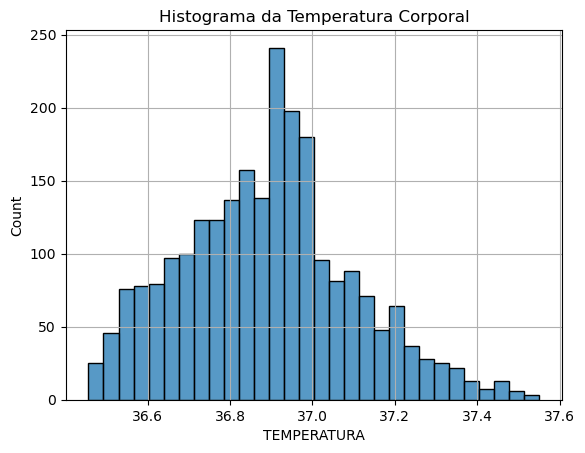

In [14]:
# Plotar o sinal do batimento cardíaco
plt.plot(df['BATIMENTO'],color='darkblue')
plt.grid()
plt.title("Sinal do Batimento Cardiaco")
plt.xlabel("AMOSTRAS")
plt.ylabel("BATIMENTO CARDIACO")
plt.show()

# Plotar o sinal da pressão arterial
plt.plot(df['PRESSAO'],color='darkblue')
plt.grid()
plt.title("Sinal da Pressão Arterial")
plt.xlabel("AMOSTRAS")
plt.ylabel("PRESSÃO ARTERIAL")
plt.show()

# Plotar o sinal da temperatura
plt.plot(df['TEMPERATURA'],color='darkblue')
plt.grid()
plt.title("Sinal da Temperatura Corporal")
plt.xlabel("AMOSTRAS")
plt.ylabel("TEMPERATURA CORPORAL")
plt.show()

# Plotar os histogramas dos dados
plt.figure()
plt.grid()
plt.title("Histograma do Batimento Cardiaco")
sns.histplot(data=df, x="BATIMENTO", bins = 30)
plt.figure()
plt.grid()
plt.title("Histograma da Pressão Arterial")
sns.histplot(data=df, x="PRESSAO", bins = 30)
plt.figure()
plt.grid()
plt.title("Histograma da Temperatura Corporal")
sns.histplot(data=df, x="TEMPERATURA", bins = 30)

In [15]:
# Verificar se há valores faltantes
print("\nQuantidade de valores faltantes:")
print(df.isnull().sum())

# Valores fora da faixa de análise padrão
valores_fora = pd.DataFrame()
# Contar valores fora da faixa, e inserir em um DataFrame
valores_fora[''] = ['Batimento','Pressão','Temperatura']
valores_fora['Valores abaixo da faixa'] = [sum(i <= 0 for i in df["BATIMENTO"]),
                                           sum(i <= 0 for i in df["PRESSAO"]),
                                           sum(i <= 0 for i in df["TEMPERATURA"])]

valores_fora['Valores acima da faixa'] = [sum(i >= 100 for i in df["BATIMENTO"]),
                                          sum(i >= 20 for i in df["PRESSAO"]),
                                          sum(i >= 40 for i in df["TEMPERATURA"])] 

valores_fora['Total'] = valores_fora['Valores abaixo da faixa'] + valores_fora['Valores acima da faixa']
                                     
print("\nQuantidade de valores fora da faixa:")
print(valores_fora.to_string(index = False))



Quantidade de valores faltantes:
HORA           0
BATIMENTO      0
PRESSAO        0
TEMPERATURA    0
dtype: int64

Quantidade de valores fora da faixa:
             Valores abaixo da faixa  Valores acima da faixa  Total
  Batimento                        0                       0      0
    Pressão                        0                       0      0
Temperatura                        0                       0      0


**2)** CONSIDERANDO-SE QUE O PACOTE PADRÃO DE DADOS CONTEM 24 AMOSTRAS COLETADAS A CADA HORA, APLIQUE A CORRELAÇÃO, PARA CADA UM DOS PARÂMETROS (O BATIMENTO CARDÍACO, A PRESSÃO ARTERIAL E A TEMPERATURA CORPORAL), PROCURE IDENTIFICAR PADRÕES DE COMPORTAMENTOS NOS VALORES AMOSTRADOS. ATENÇÃO, É PRECISO SEGMENTAR O ARQUIVO EM PACOTES MENORES COM 24 AMOSTRA CADA, OU SEJA, DIVIDA O ARQUIVO EM PACOTES COM 24 AMOSTRA CADA E APLIQUE AS FERRAMENTAS ESTATÍSTICAS. DESENVOLVER O SOFTWARE EM PYTHON.

In [16]:
# Correlação dos 100 dias de coleta de dados
n = 1

df_correlacao = pd.DataFrame()

c_HORAxBATIMENTO = []
c_HORAxPRESSAO = []
c_HORAxTEMPERATURA = []
c_BATIMENTOxPRESSAO = []
c_BATIMENTOxTEMPERATURA = []
c_TEMPERATURAxPRESSAO  = []

# Segmentação do Datasete em 100 pacotes com 24 amostras
for k in range(0,2400,24):
    
    # Cálculo da correlação de cada pacote de dados
    correlacao = df[k:k+24].corr(method ='pearson')

    c_HORAxBATIMENTO.append(correlacao['HORA'][1])
    c_HORAxPRESSAO.append(correlacao['HORA'][2])
    c_HORAxTEMPERATURA.append(correlacao['HORA'][3])
    c_BATIMENTOxPRESSAO.append(correlacao['BATIMENTO'][2])
    c_BATIMENTOxTEMPERATURA.append(correlacao['BATIMENTO'][3])
    c_TEMPERATURAxPRESSAO.append(correlacao['TEMPERATURA'][2])

df_correlacao['Hora x Batimento'] = c_HORAxBATIMENTO
df_correlacao['Hora x Pressão'] = c_HORAxPRESSAO
df_correlacao['Hora x Temperatura'] =  c_HORAxTEMPERATURA
df_correlacao['Batimento x Pressão'] = c_BATIMENTOxPRESSAO
df_correlacao['Batimento x Temperatura'] = c_BATIMENTOxTEMPERATURA
df_correlacao['Temperatura x Pressão'] = c_TEMPERATURAxPRESSAO

print(df_correlacao)

    Hora x Batimento  Hora x Pressão  Hora x Temperatura  Batimento x Pressão  \
0           0.733738        0.733738           -0.164428             1.000000   
1           0.733341        0.732996           -0.318524             0.999963   
2           0.735235        0.733666           -0.112252             0.999904   
3           0.732025        0.731475           -0.038655             0.999722   
4           0.728468        0.735148           -0.145909             0.999626   
..               ...             ...                 ...                  ...   
95          0.607741        0.701097            0.225226             0.833688   
96          0.639362        0.711009            0.483521             0.810722   
97          0.748695        0.736351            0.295464             0.817140   
98          0.643242        0.622992            0.327667             0.840495   
99          0.365379        0.634796            0.189810             0.709203   

    Batimento x Temperatura

**3)** A CORRELAÇÃO PODE SER APLICADA INDIVIDUALMENTE PARA CADA UM DOS PARÂMETROS APRESENTADOS, CONTUDO, VOCÊ PODE APLICAR A CORRELAÇÃO EM DOIS PARÂMETROS SIMULTANEAMENTE PARA A IDENTIFICAÇÃO DE PADRÕES ? POR EXEMPLO, DADO UM PERÍODO DE TEMPO, RESPEITANDO O TAMANHO DO PACOTE DE DADOS E A AMOSTRAGEM, PODE-SE UTILIZAR OS VALORES DE CORRELAÇÃO ENTRE BATIMENTOS CARDÍACOS E PRESSÃO ARTERIAL PARA COMPOR UM NOVO PADRÃO DE APRENDIZADO? AVALIE ESTA QUESTÃO - APRESENTE UMA SOLUÇÃO/RESOLUÇÃO. DESENVOLVER O SOFTWARE EM PYTHON.

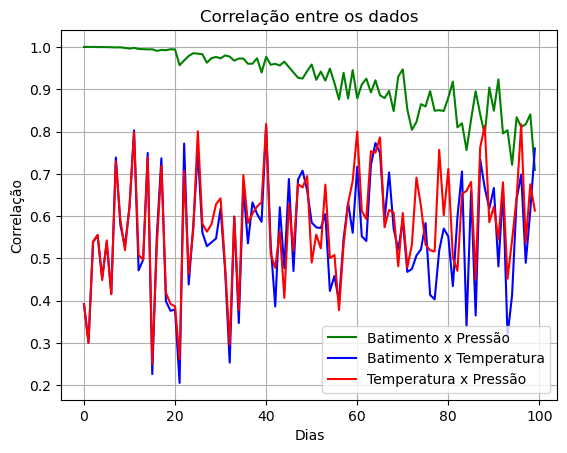

In [17]:
# Plotar a correlação entre os dados
plt.figure()
plt.grid()
plt.title("Correlação entre os dados")
plt.xlabel("Dias")
plt.ylabel("Correlação")
plt.plot(c_BATIMENTOxPRESSAO, color = 'g', label = 'Batimento x Pressão')
plt.plot(c_BATIMENTOxTEMPERATURA, color = 'b', label = 'Batimento x Temperatura')
plt.plot(c_TEMPERATURAxPRESSAO, color = 'r', label = 'Temperatura x Pressão')
plt.legend()

**4)** DIVIDA O ARQUIVO DE DADOS, PARA CADA PARÂMETRO, EM PACOTES COM 24 AMOSTRAS, CORRESPONDENDO A UM DIA DE AMOSTRAGEM. PARA CADA PACOTE AVALIADO, PODE-SE APLICAR FERRAMENTAL ESTATÍSTICO DESCRITIVO: MÉDIA, MEDIANA, MODA, DESVIO PADRÃO E HISTOGRAMA, PARA AUXILIAR NO PROCESSO DE MINERAÇÃO DE DADOS ? PARA CADA PACOTE, CALCULE: MÉDIA, MEDIANA, MODA E DESVIO PADRÃO, PROCURE ESTABELECER CRITÉRIOS PARA TOMADA DE DECISÃO, POR EXEMPLO, SE O VALOR DO BATIMENTO CARDÍACO MÉDIO E DA PRESSÃO ARTERIAL MÉDIA ESTIVEREM ACIMA DE UM DETERMINADO VALOR, APRESENTE UMA MENSAGEM DE ATENÇÃO OU UM ALARME DE EMERGÊNCIA. DESENVOLVER O SOFTWARE EM PYTHON.

**Estatística do problema, cálculo da Média, Mediana, Moda e Desvio Padrão.**

In [21]:
# ==================== ESTATÍSTICA DESCRITIVA DO PROBLEMA =====================
estatistica_Batimento = pd.DataFrame()
estatistica_Pressao = pd.DataFrame()
estatistica_Temperatura = pd.DataFrame()

media = np.zeros((100,3))
madiana = np.zeros((100,3))
moda = np.zeros((100,3))
desvio_padrao = np.zeros((100,3))
p = 0

# Segmentação do Datasete em 100 pacotes com 24 amostras
for k in range(0,2400,24):

    # Cálculo da média, madiana, e devio padrão
    aux = df[k:k+24].describe()

    media[p][0] = aux['BATIMENTO'][1]
    media[p][1] = aux['PRESSAO'][1]
    media[p][2] = aux['TEMPERATURA'][1]
    
    madiana[p][0] = aux['BATIMENTO'][5]
    madiana[p][1] = aux['PRESSAO'][5]
    madiana[p][2] = aux['TEMPERATURA'][5]
    
    desvio_padrao[p][0] = aux['BATIMENTO'][2]
    desvio_padrao[p][1] = aux['PRESSAO'][2]
    desvio_padrao[p][2] = aux['TEMPERATURA'][2]
    
    moda[p][0] = statistics.mode(df['BATIMENTO'][k:k+24])
    moda[p][1] = statistics.mode(df['PRESSAO'][k:k+24])
    moda[p][2] = statistics.mode(df['TEMPERATURA'][k:k+24])
    
    p = p + 1
    
estatistica_Batimento['Média'] = media[:,0]
estatistica_Batimento['Mediana'] = madiana[:,0]
estatistica_Batimento['Moda'] = moda[:,0]
estatistica_Batimento['Desvio Padrão'] = desvio_padrao[:,0]

estatistica_Pressao['Média'] = media[:,1]
estatistica_Pressao['Mediana'] = madiana[:,1]
estatistica_Pressao['Moda'] = moda[:,1]
estatistica_Pressao['Desvio Padrão'] = desvio_padrao[:,1]

estatistica_Temperatura['Média'] = media[:,2]
estatistica_Temperatura['Mediana'] = madiana[:,2]
estatistica_Temperatura['Moda'] = moda[:,2]
estatistica_Temperatura['Desvio Padrão'] = desvio_padrao[:,2]

print("Estatística do Batimento Cardíaco")
print(estatistica_Batimento)
print("Estatística da Pressão Arterial")
print(estatistica_Pressao)
print("Estatística da Temperatura Corporal")
print(estatistica_Temperatura)

Estatística do Batimento Cardíaco
        Média    Mediana       Moda  Desvio Padrão
0   71.356588  72.000000  70.694593       2.415405
1   71.332927  71.969427  66.519773       2.415998
2   71.309134  71.943245  66.529782       2.414659
3   71.266352  71.921010  66.402590       2.413103
4   71.261917  71.929026  66.491792       2.413285
..        ...        ...        ...            ...
95  68.803703  69.332842  64.710886       2.784849
96  69.516879  69.728628  64.638940       2.558978
97  68.909026  69.016071  61.771107       2.905336
98  68.635939  69.090365  61.812786       3.028324
99  68.632318  68.715936  65.339036       2.505884

[100 rows x 4 columns]
Estatística da Pressão Arterial
        Média    Mediana       Moda  Desvio Padrão
0   12.678294  13.000000  12.347296       1.207703
1   12.668614  12.996974  10.265532       1.207443
2   12.660945  12.990466  10.261215       1.207671
3   12.647603  12.945582  10.249249       1.208148
4   12.643528  12.987037  10.189739       1

**Tomada de Decisão**

In [22]:
diagnostico = pd.DataFrame()
d = []
# Diagnóstico do Batimento Cardíaco
for m in estatistica_Batimento['Média']:
    
    if (m < 100):
        d.append("Normal")
    else:
        d.append("Preocupante")

diagnostico['Batimento Cardíaco'] = d

d.clear()

# Diagnóstico da Pressão Arterial
for m in estatistica_Pressao['Média']:
    
    if (m < 9):
        d.append("Pressão Baixa")
    elif ((m >= 9) and (m <= 12)):
        d.append("Normal")
    elif ((m > 12) and (m < 14)):
        d.append("Pré-Hipertensão")
    elif ((m >= 14) and (m < 16)):
        d.append("Hipertensão Estágio 1")
    elif ((m >= 16) and (m < 18)):
        d.append("Hipertensão Estágio 2")
    elif (m >= 18):
        d.append("Crise Hipertensiva")

diagnostico['Pressão Arterial'] = d

d.clear()

# Diagnóstico da Temperatura Corporal
for m in estatistica_Temperatura['Média']:
    
    if (m < 35):
        d.append("Hipotermia")
    elif ((m > 35) and (m <= 37.7)):
        d.append("Normal")
    elif ((m > 37.7) and (m <= 39.5)):
        d.append("Febre")
    elif ((m > 39.5) and (m <= 41)):
        d.append("Febre Alta")
    elif (m > 41):
        d.append("Hipertemia")

diagnostico['Temperatura Corporal'] = d

d.clear()

print("\n*************************************************************\n")
print("Diagnóstico: \n")
print("Batimento Cardíaco: ", statistics.mode(diagnostico['Batimento Cardíaco']))
print("Pressão Arterial: ", statistics.mode(diagnostico['Pressão Arterial']))
print("Temperatura Corporal: ", statistics.mode(diagnostico['Temperatura Corporal']))


*************************************************************

Diagnóstico: 

Batimento Cardíaco:  Normal
Pressão Arterial:  Pré-Hipertensão
Temperatura Corporal:  Normal


**Apêndice:** Plotagem dos Sinais e dos Histogramas dos Dados

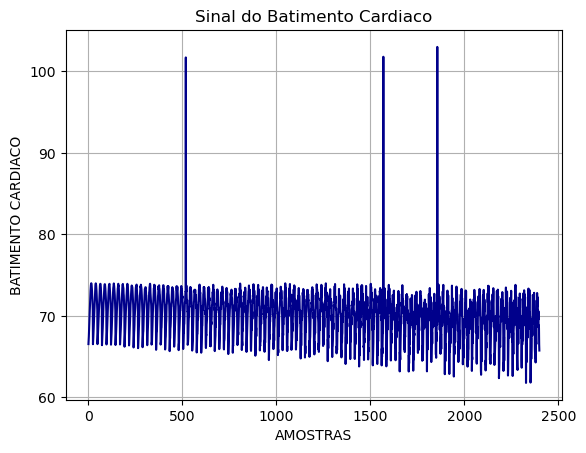

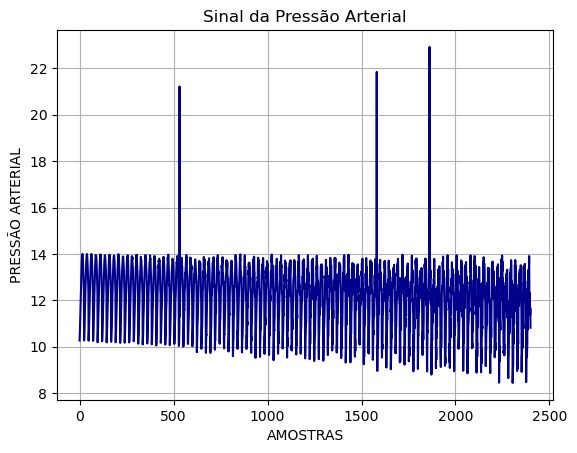

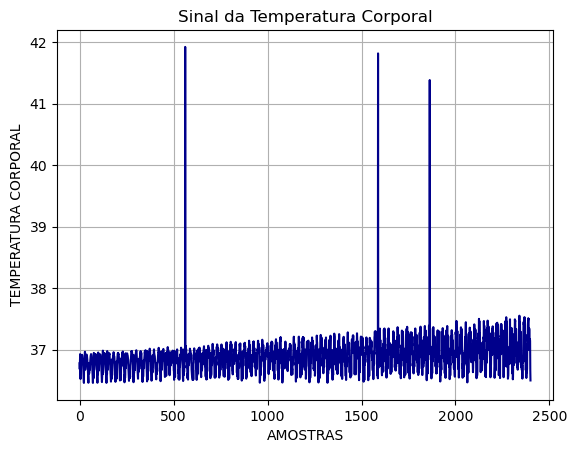

<Axes: title={'center': 'Histograma da Temperatura Corporal'}, xlabel='TEMPERATURA', ylabel='Count'>

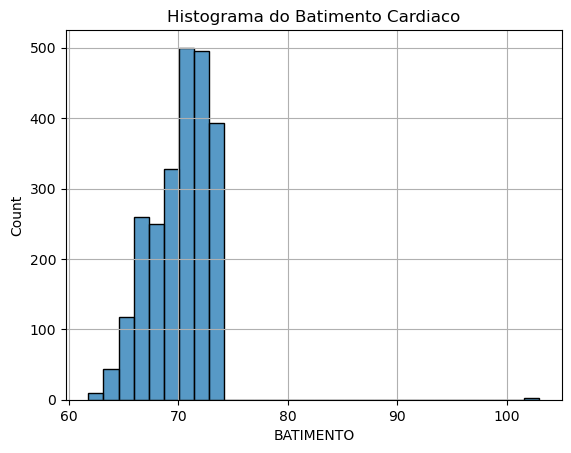

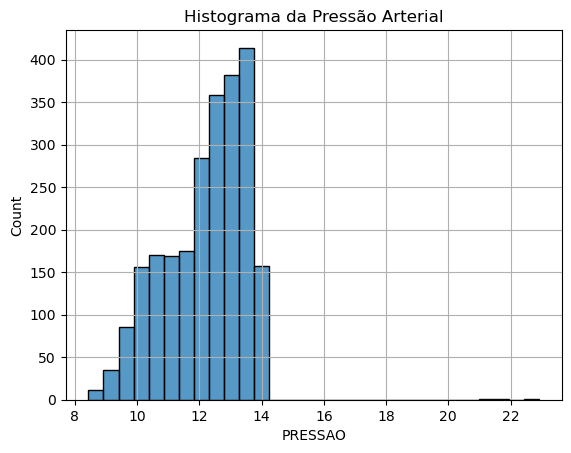

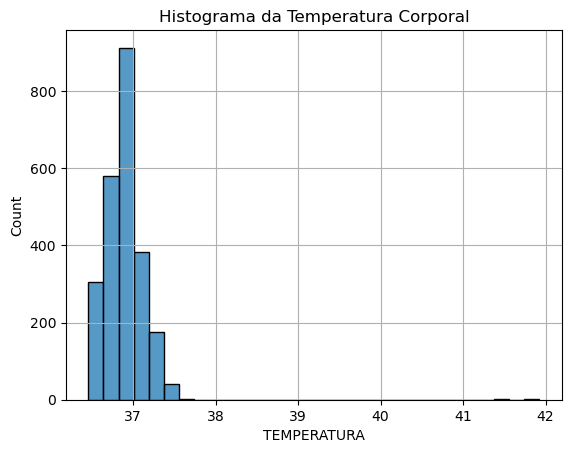

In [23]:
# Plotar o sinal do batimento cardíaco
plt.plot(df0['BATIMENTO'],color='darkblue')
plt.grid()
plt.title("Sinal do Batimento Cardiaco")
plt.xlabel("AMOSTRAS")
plt.ylabel("BATIMENTO CARDIACO")
plt.show()

# Plotar o sinal da pressão arterial
plt.plot(df0['PRESSAO'],color='darkblue')
plt.grid()
plt.title("Sinal da Pressão Arterial")
plt.xlabel("AMOSTRAS")
plt.ylabel("PRESSÃO ARTERIAL")
plt.show()

# Plotar o sinal da temperatura
plt.plot(df0['TEMPERATURA'],color='darkblue')
plt.grid()
plt.title("Sinal da Temperatura Corporal")
plt.xlabel("AMOSTRAS")
plt.ylabel("TEMPERATURA CORPORAL")
plt.show()

# Plotar os histogramas dos dados
plt.figure()
plt.grid()
plt.title("Histograma do Batimento Cardiaco")
sns.histplot(data=df0, x="BATIMENTO", bins = 30)
plt.figure()
plt.grid()
plt.title("Histograma da Pressão Arterial")
sns.histplot(data=df0, x="PRESSAO", bins = 30)
plt.figure()
plt.grid()
plt.title("Histograma da Temperatura Corporal")
sns.histplot(data=df0, x="TEMPERATURA", bins = 30)